# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

# **ORIGINAL**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
df = pd.read_csv("icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)

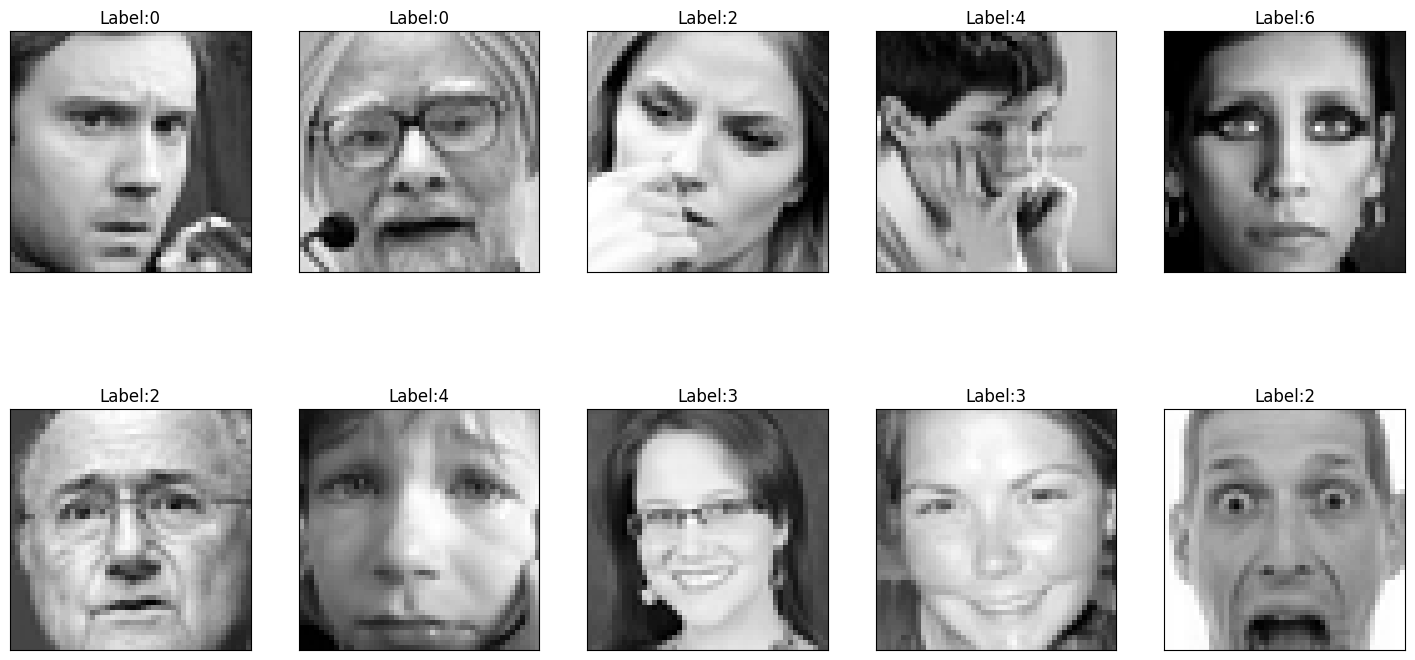

In [6]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [32]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import MinMaxScaler

# #chuẩn hóa ảnh và trả về ảnh đã được chuẩn hóa sau khi giảm chiều
# def pca_scale(images: np.ndarray):
#     result = np.zeros(shape=(len(images), 48, 48))    
#     for i in range(len(images)):
#         scaler = MinMaxScaler()
#         im_scaled = scaler.fit_transform(images[i])
#         pca = PCA(n_components=2)                                 
#         im_pca = pca.fit_transform(im_scaled)
#         im_pca_inverse = pca.inverse_transform(im_pca)
#         im_pca_inverse_scale = scaler.inverse_transform(im_pca_inverse)
#         result[i] = im_pca_inverse_scale
#     return result

# images_pca = pca_scale(images)

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543:

In [33]:
# images_pca

array([[[ 69.92227962,  69.47159956,  71.33778399, ...,  71.14179395,
          70.10387667,  65.2483088 ],
        [ 52.82102463,  50.60910656,  55.80038396, ...,  65.73699948,
          65.00483841,  57.84521128],
        [ 45.32619627,  43.96838786,  51.78460612, ...,  62.29432873,
          61.49049457,  53.47582562],
        ...,
        [ 54.46648954,  41.03399338,  37.72576861, ...,  73.78007391,
          74.4592373 ,  66.43735762],
        [ 53.01114232,  36.2590694 ,  30.9575554 , ...,  75.41367232,
          76.51979537,  68.00018867],
        [ 59.7630483 ,  45.02639604,  39.36004239, ...,  76.67570742,
          77.49413687,  70.00984138]],

       [[151.19293578, 137.03732604, 133.56121237, ..., 125.89470203,
         108.36604598, 117.44017796],
        [151.20645297, 137.13225287, 133.3070466 , ..., 126.07237828,
         108.85261862, 117.34484219],
        [152.06583691, 136.37120274, 133.636363  , ..., 128.41238264,
         110.84608787, 121.48090416],
        ...,


(35887, 48, 48)


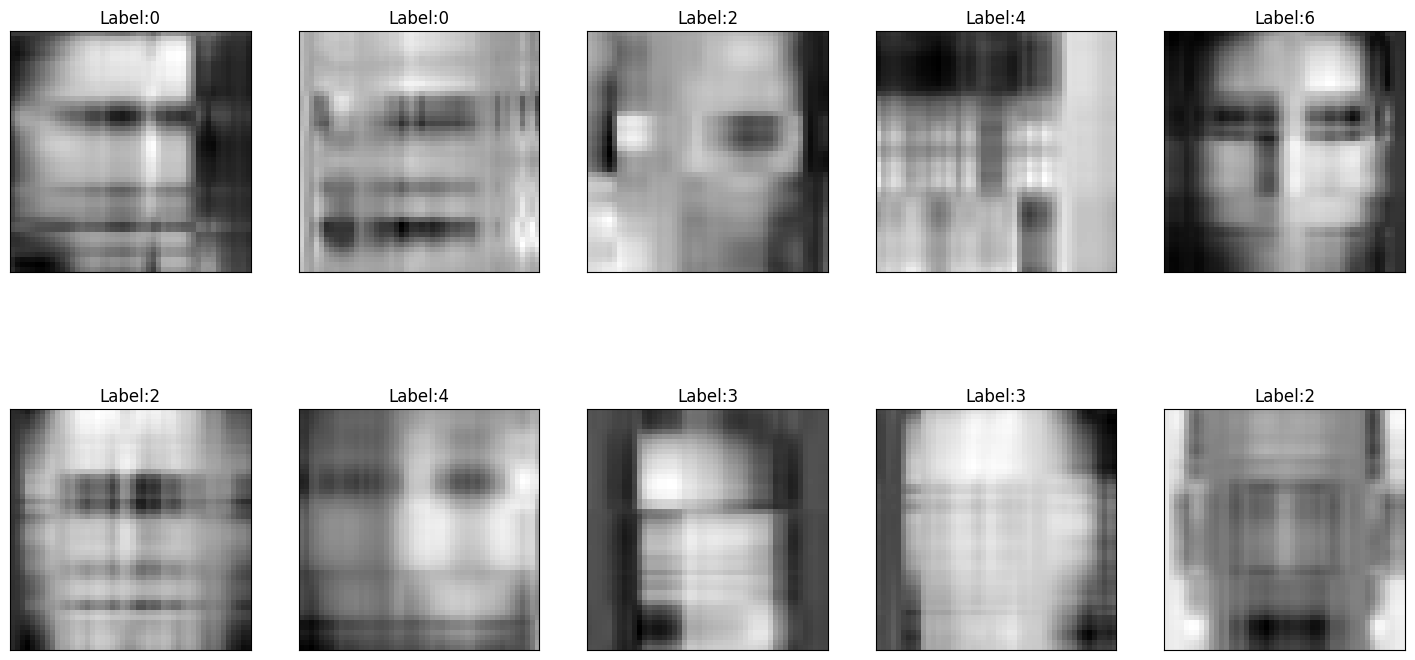

In [34]:
# ## transform for visualizing here
# print(images_pca.shape)
# show_img(images_pca, labels)

C:\Users\_DELL_\AppData\Local\Temp\ipykernel_15660\180957503.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(images_pca[:,1], images_pca[:,2], cmap="rainbow")


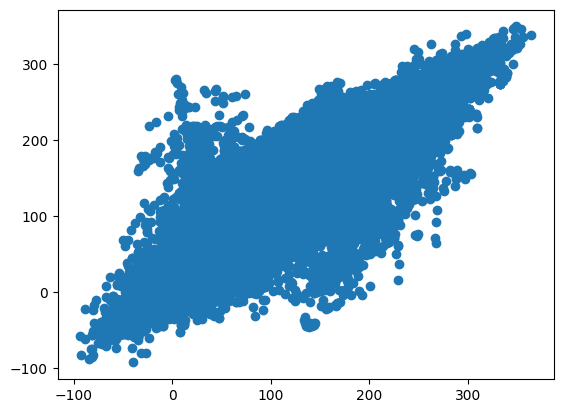

In [35]:
# plt.scatter(images_pca[:,1], images_pca[:,2], cmap="rainbow")

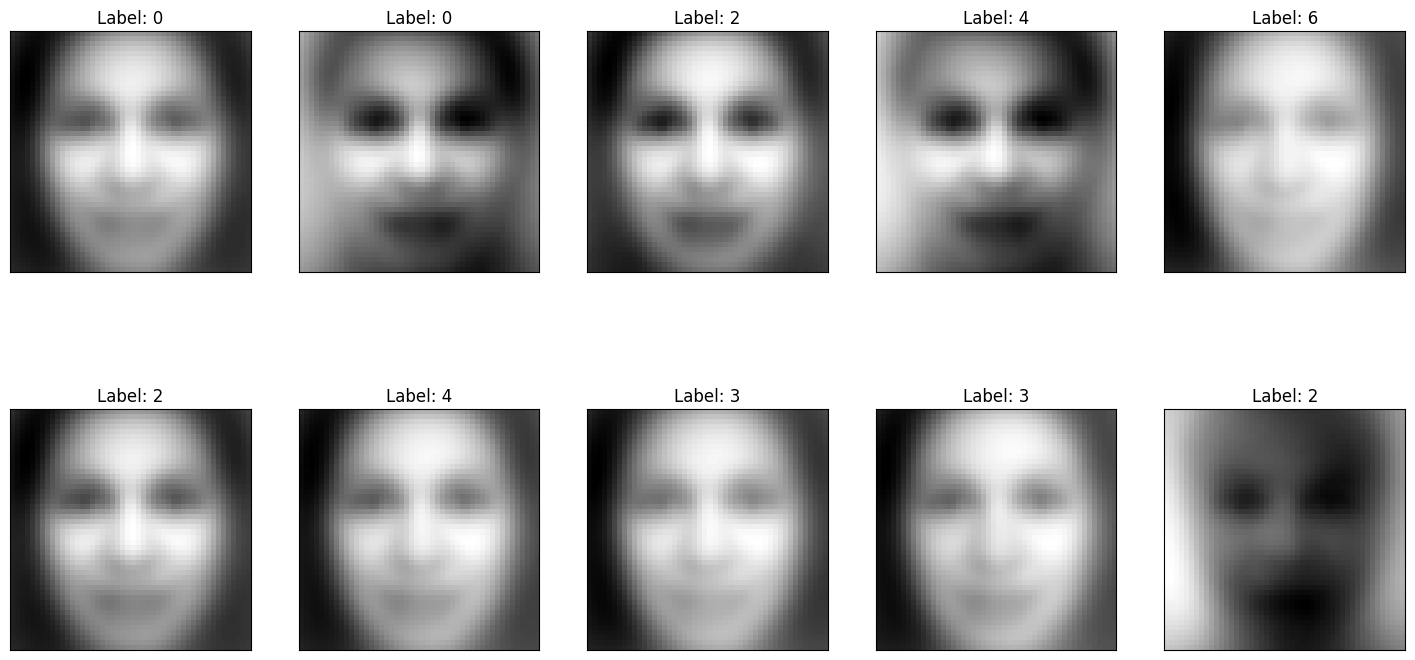

In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def pca_scale(images: np.ndarray) -> np.ndarray:
    # Flatten the images
    n_samples, height, width = images.shape
    flat_images = images.reshape(n_samples, -1)
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_images = scaler.fit_transform(flat_images)
    
    # Apply PCA
    pca = PCA(n_components=2)
    images_pca = pca.fit_transform(scaled_images)
    
    # Inverse transform the PCA
    images_pca_inverse = pca.inverse_transform(images_pca)
    
    # Inverse transform the scaling
    images_pca_inverse_scaled = scaler.inverse_transform(images_pca_inverse)
    
    # Reshape back to the original image shape
    result = images_pca_inverse_scaled.reshape(n_samples, height, width)
    
    return result

# Apply PCA scaling
images_pca = pca_scale(images)

# Visualize some of the PCA-transformed images
def show_img(images: np.ndarray, labels: np.ndarray):
    fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr = axarr.flatten()
    
    for idx, (image, label) in enumerate(zip(images[:10], labels[:10])):
        axarr[idx].imshow(image, cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title(f"Label: {label}")
    
    plt.show()

# Showing PCA-transformed images
show_img(images_pca, labels)


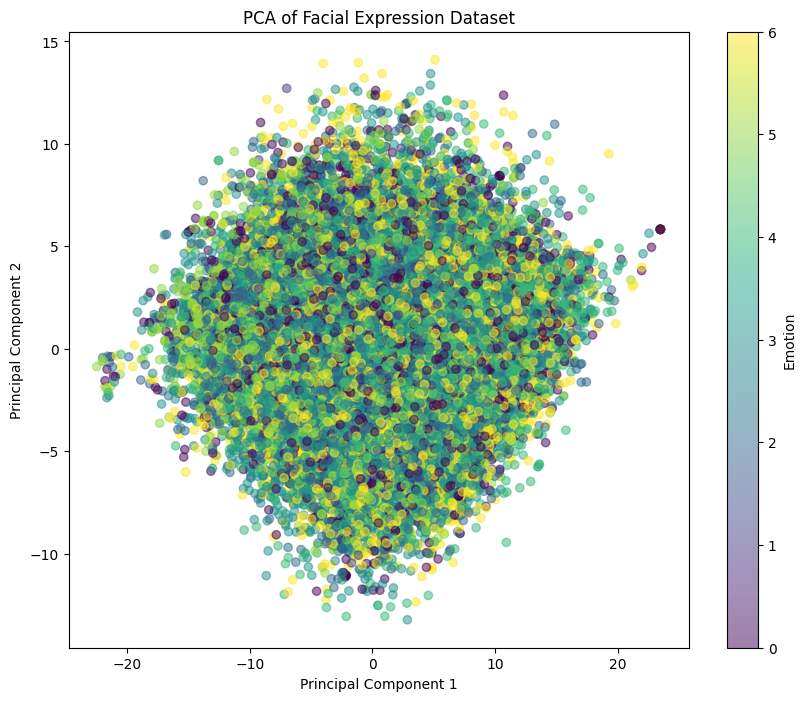

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Parse the data
def parse_data(data: pd.DataFrame):
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

# Perform PCA and create scatter plot
def pca_scatter(images: np.ndarray, labels: np.ndarray):
    # Flatten the images
    n_samples, height, width = images.shape
    flat_images = images.reshape(n_samples, -1)
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_images = scaler.fit_transform(flat_images)
    
    # Apply PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(scaled_images)
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', alpha=0.5)
    plt.colorbar(scatter, label='Emotion')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Facial Expression Dataset')
    plt.show()

# Assuming df is your DataFrame
images, labels = parse_data(df)

# Create the scatter plot
pca_scatter(images, labels)


Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [36]:
# scaler = MinMaxScaler()
# optimal = [0] * 25
# pca = PCA()
# threshold = 0.95
# for i in range(len(images)):
#   im = scaler.fit_transform(images[i])
#   pca.fit(im)
#   explained_variance = pca.explained_variance_
#   cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
#   optimal_num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
#   optimal[optimal_num_components] += 1

# for i in range(len(optimal)):
#   print(f'Số lượng thành phần chính tối ưu là {i} : {optimal[i]}')

c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\_DELL_\AppData\Local\Temp\ipykernel_15660\4193474035.py:9: RuntimeWarning: invalid value encountered in divide
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var
C:\Users\_DELL_\AppData\Local\Temp\ipykernel_15660\4193474035.py:9: RuntimeWarning: invalid value encountered in divide
  cumulative_explained_variance = np.cumsum(explained_variance / np.sum(explained_variance))
c:\Users\_DELL_\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_pca.py:543: RuntimeWarning: inv

Số lượng thành phần chính tối ưu là 0 : 0
Số lượng thành phần chính tối ưu là 1 : 13
Số lượng thành phần chính tối ưu là 2 : 5
Số lượng thành phần chính tối ưu là 3 : 11
Số lượng thành phần chính tối ưu là 4 : 48
Số lượng thành phần chính tối ưu là 5 : 173
Số lượng thành phần chính tối ưu là 6 : 685
Số lượng thành phần chính tối ưu là 7 : 1813
Số lượng thành phần chính tối ưu là 8 : 3779
Số lượng thành phần chính tối ưu là 9 : 6128
Số lượng thành phần chính tối ưu là 10 : 7352
Số lượng thành phần chính tối ưu là 11 : 6426
Số lượng thành phần chính tối ưu là 12 : 4639
Số lượng thành phần chính tối ưu là 13 : 2646
Số lượng thành phần chính tối ưu là 14 : 1289
Số lượng thành phần chính tối ưu là 15 : 543
Số lượng thành phần chính tối ưu là 16 : 181
Số lượng thành phần chính tối ưu là 17 : 74
Số lượng thành phần chính tối ưu là 18 : 39
Số lượng thành phần chính tối ưu là 19 : 21
Số lượng thành phần chính tối ưu là 20 : 8
Số lượng thành phần chính tối ưu là 21 : 6
Số lượng thành phần chính 

## **another**

### **Step1**: Fit PCA with a High Number of Components

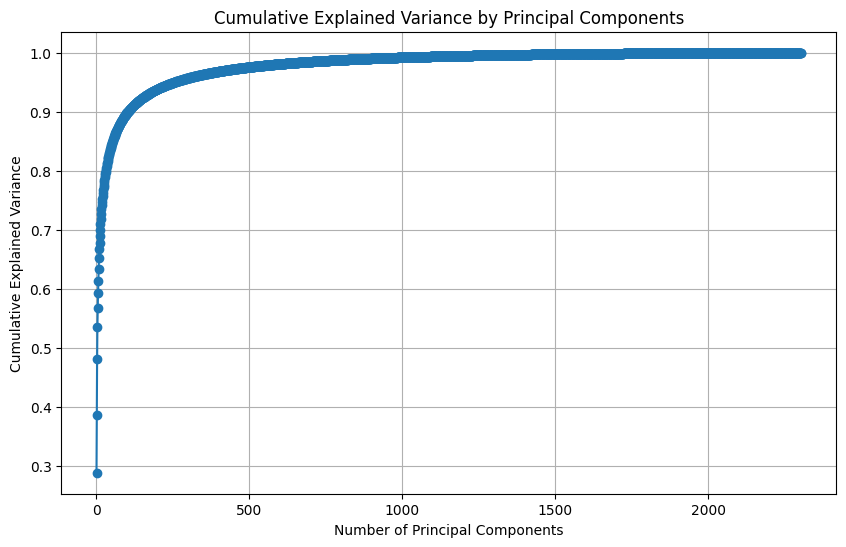

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming images is your numpy array of shape (n_samples, 48, 48)
# Flatten the images
n_samples, height, width = images.shape
flat_images = images.reshape(n_samples, -1)

# Scale the data
scaler = MinMaxScaler()
scaled_images = scaler.fit_transform(flat_images)

# Apply PCA with a high number of components
pca = PCA(n_components=min(n_samples, flat_images.shape[1]))  # Use the smaller of number of samples or features
pca.fit(scaled_images)

# Explained variance
explained_variance = pca.explained_variance_
cumulative_explained_variance = np.cumsum(explained_variance) / np.sum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()


- It looks like the cumulative explained variance increases rapidly with the first few components and then starts to level off.
- This is a typical "elbow" pattern, where you can determine the optimal number of components by finding the point at which the curve begins to flatten.

### **Step 2: Threshold method**
Select the number of components that reach or exceed this threshold.

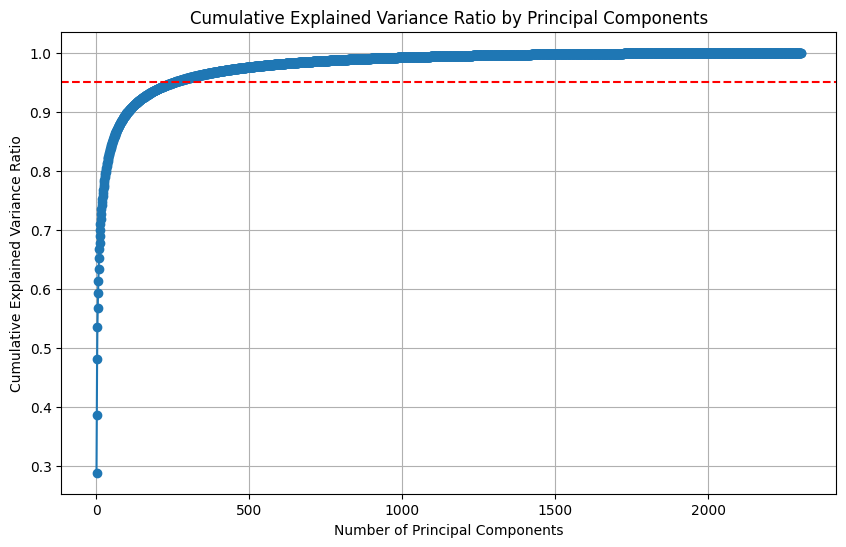

Optimal number of principal components: 255


In [13]:

# Alternatively, you can use a percentage-based approach
# explained_variance_ratio_ gives the proportion of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()

# Determine the number of components that explain at least 95% of the variance
threshold = 0.95
optimal_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f"Optimal number of principal components: {optimal_components}")



### **Explanation**

1. Explained Variance Ratio:
- `explained_variance_ratio = pca.explained_variance_ratio_` gives the proportion of variance explained by each component.
- `cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)` calculates the cumulative sum of the explained variance ratios.

2. Plot:
- A red horizontal line is plotted at 0.95 to represent the 95% threshold.

3. Optimal Components:
- `optimal_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1` finds the index where the cumulative explained variance ratio first reaches or exceeds 95%. The `+1` is to adjust for the zero-based index.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### Train Test Dataset

In [37]:
# ## splitting data into train/val/test subsets here
from sklearn.model_selection import train_test_split

In [38]:
image_resized = images.reshape(images.shape[0], 48*48)
image_resized.shape

(35887, 2304)

In [39]:
trainX, testX ,trainY, testY = train_test_split(image_resized, labels, train_size=0.8, random_state=20)

In [40]:
train_pca, test_pca, trainY_pca, testY_pca = train_test_split(images_pca.reshape(images_pca.shape[0], 48*48), labels, train_size=0.8, random_state=20)

### TRAINING MODEL

## MLP

In [41]:
# ## modify images' array to the appropriate shape
# #chuẩn bị data gốc và data đã được pca
# def pca_scale1(images1: np.ndarray, images2: np.ndarray):
#     trainX = np.zeros(shape=(len(images1), 48, 48))
#     testX = np.zeros(shape=(len(images2), 48, 48))
#     scaler = MinMaxScaler()
#     pca = PCA(n_components=12)
#     for i in range(len(images1)):
#         im_scaled = scaler.fit_transform(images1[i])                                 
#         im_pca = pca.fit_transform(im_scaled)
#         im_pca_inverse = pca.inverse_transform(im_pca)
#         im_pca_inverse_scale = scaler.inverse_transform(im_pca_inverse)
#         trainX[i] = im_pca_inverse_scale

#     for i in range(len(images2)):
#         im_scaled = scaler.transform(images[i])
#         im_pca = pca.transform(im_scaled)
#         im_pca_inverse = pca.inverse_transform(im_pca)
#         im_pca_inverse_scale = scaler.inverse_transform(im_pca_inverse)
#         testX[i] = im_pca_inverse_scale
    
#     return trainX, testX

# trainX_pca, testX_pca = pca_scale1(trainX, testX)

In [42]:
# #reshape image
# trainX_shape = trainX.reshape(len(trainX), 48*48)
# trainX_pca_shape = trainX_pca.reshape(len(trainX_pca), 48*48)
# testX_shape = testX.reshape(len(testX), 48*48)
# testX_pca_shape = testX_pca.reshape(len(testX_pca), 48*48)

# print(trainX_shape.shape)
# print(testX_shape.shape)
# print(trainX_pca_shape.shape)
# print(testX_pca_shape.shape)

In [43]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import classification_report

# mlp = mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, alpha=0.0001,
#                     solver='adam', verbose=10, random_state=42, learning_rate_init=0.001,
#                     activation='relu', learning_rate='adaptive', batch_size=32)

# mlp.fit(trainX_shape, trainY)
# # mlp.fit(trainX_pca_shape, trainY)

# y_pred = mlp.predict(testX_shape)
# # y_pred_pca = mlp.predict(testX_pca_shape)

# print(classification_report(testY, y_pred))
# # print(classification_report(testY, y_pred_pca))

### Random Forest Classifier

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)
model.fit(trainX, trainY)

y_pred = model.predict(testX)
print(classification_report(testY, y_pred))
# model.fit(trainX_pca_shape, trainY)

              precision    recall  f1-score   support

           0       0.54      0.15      0.23       983
           1       1.00      0.18      0.30       112
           2       0.53      0.25      0.34       995
           3       0.43      0.83      0.57      1784
           4       0.37      0.35      0.36      1226
           5       0.69      0.57      0.63       831
           6       0.44      0.40      0.42      1247

    accuracy                           0.46      7178
   macro avg       0.57      0.39      0.41      7178
weighted avg       0.49      0.46      0.43      7178



In [46]:
model.fit(train_pca, trainY_pca)
y_pred_pca = model.predict(test_pca)
print(classification_report(testY_pca, y_pred_pca))

              precision    recall  f1-score   support

           0       0.51      0.18      0.27       983
           1       1.00      0.22      0.36       112
           2       0.52      0.26      0.34       995
           3       0.43      0.79      0.56      1784
           4       0.37      0.37      0.37      1226
           5       0.68      0.57      0.62       831
           6       0.42      0.39      0.40      1247

    accuracy                           0.46      7178
   macro avg       0.56      0.40      0.42      7178
weighted avg       0.48      0.46      0.43      7178



## SVM

In [47]:
# from sklearn.svm import SVC

# model = SVC(kernel='rbf', C=1.0, gamma=0.01, random_state=42)
# model.fit(trainX, trainY)

# y_pred = model.predict(testX)
# print(classification_report(testY, y_pred))

## NAVIE BAYES

In [55]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
nb =  MultiOutputClassifier(GaussianNB())  
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)

# Fit the model on the original data
multi_target_nb.fit(trainX, trainY)

# Predict on the test set
y_pred = multi_target_nb.predict(testX)

# Evaluate the model
print(classification_report(testY, y_pred))

# Fit the model on the PCA-transformed data
multi_target_nb.fit(train_pca, trainY_pca)

# Predict on the PCA test set
y_pred_pca = multi_target_nb.predict(test_pca)

# Evaluate the model with PCA data
print(classification_report(testY_pca, y_pred_pca))

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [59]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming labels is a 1D array of shape (n_samples,)
# Reshape it to (n_samples, 1) for single-output classification
labels = labels.reshape(-1, 1)

# Split data into train and test sets
trainX, testX, trainY, testY = train_test_split(image_resized, labels, train_size=0.8, random_state=20)
train_pca, test_pca, trainY_pca, testY_pca = train_test_split(images_pca.reshape(images_pca.shape[0], 48*48), labels, train_size=0.8, random_state=20)

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Wrap the classifier with MultiOutputClassifier for multi-output classification
multi_target_nb = MultiOutputClassifier(nb, n_jobs=-1)

# Fit the model on the original data
multi_target_nb.fit(trainX, trainY)

# Predict on the test set
y_pred = multi_target_nb.predict(testX)

# Evaluate the model
print("Classification Report for original data:")
print(classification_report(testY, y_pred))

# Fit the model on the PCA-transformed data
multi_target_nb.fit(train_pca, trainY_pca)

# Predict on the PCA test set
y_pred_pca = multi_target_nb.predict(test_pca)

# Evaluate the model with PCA data
print("\nClassification Report for PCA-transformed data:")
print(classification_report(testY_pca, y_pred_pca))


Classification Report for original data:
              precision    recall  f1-score   support

           0       0.21      0.05      0.08       983
           1       0.03      0.22      0.05       112
           2       0.19      0.05      0.07       995
           3       0.40      0.15      0.22      1784
           4       0.25      0.41      0.31      1226
           5       0.21      0.60      0.31       831
           6       0.25      0.14      0.18      1247

    accuracy                           0.22      7178
   macro avg       0.22      0.23      0.17      7178
weighted avg       0.26      0.22      0.20      7178


Classification Report for PCA-transformed data:
              precision    recall  f1-score   support

           0       0.20      0.06      0.09       983
           1       0.02      0.16      0.04       112
           2       0.20      0.04      0.07       995
           3       0.39      0.18      0.25      1784
           4       0.24      0.40      0.3

## Decision Tree 

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(max_depth=15, random_state=42)
model.fit(trainX, trainY)

y_pred = model.predict(testX)
print(classification_report(testY, y_pred))

              precision    recall  f1-score   support

           0       0.21      0.20      0.21       983
           1       0.22      0.16      0.19       112
           2       0.28      0.26      0.27       995
           3       0.42      0.43      0.42      1784
           4       0.24      0.23      0.24      1226
           5       0.47      0.40      0.43       831
           6       0.26      0.32      0.29      1247

    accuracy                           0.31      7178
   macro avg       0.30      0.29      0.29      7178
weighted avg       0.32      0.31      0.31      7178



In [50]:
model.fit(train_pca, trainY_pca)
y_pred_pca = model.predict(test_pca)
print(classification_report(testY_pca, y_pred_pca))

              precision    recall  f1-score   support

           0       0.21      0.18      0.19       983
           1       0.30      0.16      0.21       112
           2       0.22      0.21      0.22       995
           3       0.41      0.45      0.43      1784
           4       0.26      0.27      0.26      1226
           5       0.46      0.41      0.43       831
           6       0.27      0.29      0.28      1247

    accuracy                           0.31      7178
   macro avg       0.30      0.28      0.29      7178
weighted avg       0.31      0.31      0.31      7178



## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)

